In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [38]:
data=pd.read_csv('../Data/insurance fraud claims.csv')

In [39]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [41]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [42]:
data.replace('?', np.nan, inplace=True)
data.drop(columns="_c39", inplace=True)

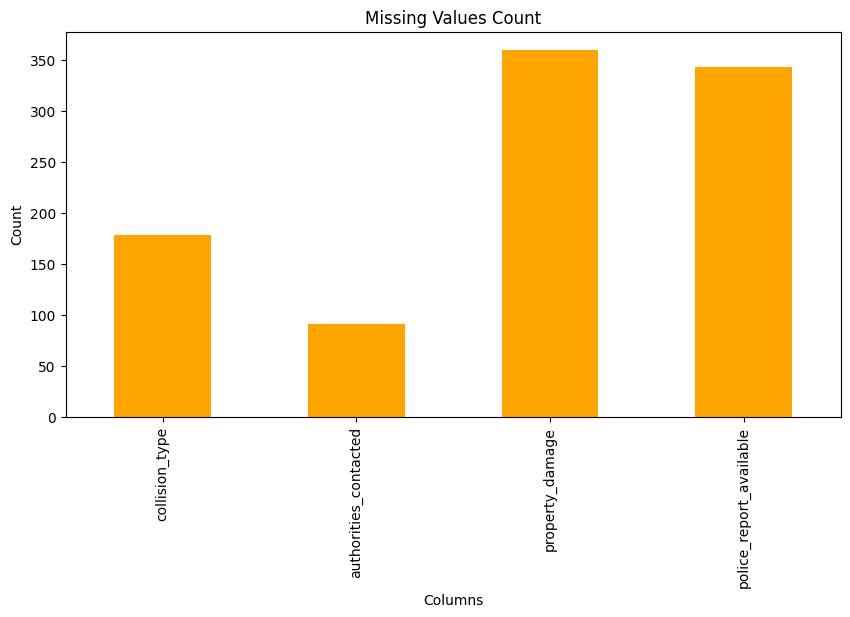

In [43]:
missing=data.isnull().sum()
missing[missing>0].plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Missing Values Count')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

In [44]:
missing_value_columns=missing[missing>0].keys().tolist()
for column in missing_value_columns:
    print(f"Column: {column}, datatype: {data[column].dtype}, missing values: {data[column].isnull().sum()}")

Column: collision_type, datatype: object, missing values: 178
Column: authorities_contacted, datatype: object, missing values: 91
Column: property_damage, datatype: object, missing values: 360
Column: police_report_available, datatype: object, missing values: 343


In [45]:
impute=SimpleImputer(strategy='most_frequent')
data[missing_value_columns] = impute.fit_transform(data[missing_value_columns])
data[missing_value_columns].isnull().sum()

collision_type             0
authorities_contacted      0
property_damage            0
police_report_available    0
dtype: int64

In [46]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
# 1. Distribution of Fraudulent Claims
sns.countplot(data=data, x='fraud_reported', palette='coolwarm')
plt.title('Distribution of Fraudulent Claims')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.show()

# 2. Correlation Heatmap for Numerical Features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 3. Fraud Claims by Incident Severity
sns.countplot(data=data, x='incident_severity', hue='fraud_reported_Y', palette='viridis')
plt.title('Fraud Claims by Incident Severity')
plt.xlabel('Incident Severity')
plt.ylabel('Count')
plt.legend(title='Fraud Reported')
plt.show()

# 4. Average Claim Amount by Auto Make
avg_claim_by_make = data.groupby('auto_make')['total_claim_amount'].mean().sort_values()
avg_claim_by_make.plot(kind='barh', figsize=(10, 6), color='teal')
plt.title('Average Claim Amount by Auto Make')
plt.xlabel('Average Claim Amount')
plt.ylabel('Auto Make')
plt.show()

# 5. Fraud Claims by Policy State
sns.countplot(data=data, x='policy_state_OH', hue='fraud_reported_Y', palette='Set2')
plt.title('Fraud Claims by Policy State')
plt.xlabel('Policy State (OH)')
plt.ylabel('Count')
plt.legend(title='Fraud Reported')
plt.show()

# 6. Distribution of Days Since Incident
sns.histplot(data=data, x='days_since_incident', kde=True, color='purple')
plt.title('Distribution of Days Since Incident')
plt.xlabel('Days Since Incident')
plt.ylabel('Frequency')
plt.show()

# 7. Fraud Claims by Number of Vehicles Involved
sns.boxplot(data=data, x='fraud_reported_Y', y='number_of_vehicles_involved', palette='cool')
plt.title('Fraud Claims by Number of Vehicles Involved')
plt.xlabel('Fraud Reported')
plt.ylabel('Number of Vehicles Involved')
plt.show()

# 8. Policy Age vs Total Claim Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='policy_age', y='total_claim_amount', hue='fraud_reported_Y', palette='coolwarm')
plt.title('Policy Age vs Total Claim Amount')
plt.xlabel('Policy Age')
plt.ylabel('Total Claim Amount')
plt.legend(title='Fraud Reported')
plt.show()

# 9. Fraud Claims by Authorities Contacted
sns.countplot(data=data, x='authorities_contacted', hue='fraud_reported_Y', palette='cubehelix')
plt.title('Fraud Claims by Authorities Contacted')
plt.xlabel('Authorities Contacted')
plt.ylabel('Count')
plt.legend(title='Fraud Reported')
plt.show()

# 10. Pairplot for Key Features
sns.pairplot(data[['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported_Y']], hue='fraud_reported_Y', palette='husl')
plt.title('Pairplot for Key Features')
plt.show()

ValueError: Could not interpret value `fraud_reported_Y` for `x`. An entry with this name does not appear in `data`.

In [33]:
def preprocess_data(data):
    # Convert date columns to datetime and extract features
    data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])
    data['incident_date'] = pd.to_datetime(data['incident_date'])
    data['policy_age'] = (pd.Timestamp.now() - data['policy_bind_date']).dt.days
    data['days_since_incident'] = (pd.Timestamp.now() - data['incident_date']).dt.days
    data.drop(columns=['policy_bind_date', 'incident_date'], inplace=True)
    
    # Drop irrelevant columns
    data.drop(columns=['policy_number', 'insured_zip', 'incident_location'], inplace=True)
    
    # Encode categorical variables
    categorical_columns = data.select_dtypes(include=['object']).columns
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
    
    # Standardize numerical variables
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    scaler = StandardScaler()
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
    
    return data

data = preprocess_data(data)

In [35]:
data

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported_Y
0,1.078140,0.990836,-0.222383,0.616705,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,...,False,False,False,False,False,False,False,False,False,True
1,0.208995,0.334073,1.412784,-0.242521,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,...,False,False,False,False,False,False,False,False,False,True
2,-0.608002,-1.088913,1.412784,0.642233,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,...,True,False,False,False,False,False,False,False,False,False
3,0.452355,0.224613,1.412784,0.652886,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,...,False,False,False,False,True,False,False,False,False,True
4,0.208995,0.552994,-0.222383,1.341980,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,-0.222383,0.222884,-0.479476,-0.901927,0.953851,1.202666,-0.823865,-1.210174,...,False,False,False,False,False,False,False,False,False,False
996,0.704407,0.224613,-0.222383,0.739141,-0.479476,1.643100,0.953851,1.634452,-0.823865,1.229693,...,False,False,False,False,False,False,False,False,False,False
997,-0.642767,-0.541611,-1.039966,0.520739,0.826998,0.358023,0.953851,-1.100189,1.140056,1.229693,...,False,False,False,False,False,False,False,False,False,False
998,2.208028,2.523284,1.412784,0.411866,1.697980,-0.901927,0.953851,-1.388046,-0.823865,-1.210174,...,False,False,False,False,False,False,False,False,False,False


In [34]:
#data.to_csv('../Data/processed_insurance_fraud_claims.csv', index=False)